# Notebook to analyzize data for ML characterization paper 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual
import os
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
sns.set_context("paper")
sns.set_style("ticks")
sns.set_palette("deep")

## SUMMARY

In [3]:
data_csv = "./summary.csv"
data_df = pd.read_csv(data_csv, comment='#')
data_df

,Scenario,Number of individuals,Makespan
0,Pegasus + Decaf,10,8545.564757
1,Pegasus + Decaf,10,8617.368437
2,Pegasus + Decaf,16,5548.862150
3,Pegasus + Decaf,16,5746.533455
4,Pegasus + Decaf,2,46043.560966
5,Pegasus + Decaf,2,48048.073383
6,Pegasus + Decaf,2,45851.159791
7,Pegasus + Decaf,5,17509.077754
8,Pegasus + Decaf,5,18488.813625
9,Pegasus + Decaf,5,17552.700572


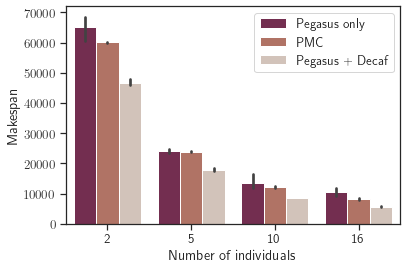

In [4]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")
sns.set_palette("twilight_shifted_r")
hue_order = ['Pegasus only', 'PMC', 'Pegasus + Decaf']
ax = sns.barplot(x='Number of individuals', y='Makespan', hue='Scenario', data=data_df, hue_order=hue_order)
ax.legend_.set_title("")
# plt.savefig('walltime.png', bbox_inches='tight', dpi=12000)
# plt.savefig('walltime.png', bbox_inches='tight')

In [5]:
data_df['Average'] = data_df.groupby(['Scenario','Number of individuals'])['Makespan'].transform('mean')
temp_df = data_df[['Scenario','Number of individuals','Average']].drop_duplicates() 
temp_df['Percentage of Pegasus only (\%)'] = temp_df['Average']*100 / temp_df.groupby('Number of individuals')['Average'].transform('max')
temp_df

,Scenario,Number of individuals,Average,Percentage of Pegasus only (\%)
0,Pegasus + Decaf,10,8581.466597,62.865330
2,Pegasus + Decaf,16,5647.697802,53.746948
4,Pegasus + Decaf,2,46647.598047,71.598292
7,Pegasus + Decaf,5,17850.197317,73.919799
10,Pegasus only,10,13650.555333,100.000000
13,Pegasus only,16,10507.941500,100.000000
15,Pegasus only,2,65151.830667,100.000000
18,Pegasus only,5,24148.060000,100.000000
21,PMC,10,12103.822957,88.669088
23,PMC,16,8157.573478,77.632460


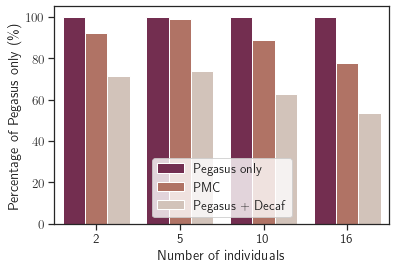

In [6]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")
sns.set_palette("twilight_shifted_r")
hue_order = ['Pegasus only', 'PMC', 'Pegasus + Decaf']
ax = sns.barplot(x='Number of individuals', y='Percentage of Pegasus only (\%)', hue='Scenario', data=temp_df, hue_order=hue_order)
ax.legend_.set_title("")
plt.legend(loc=8)
# plt.savefig('walltime.png', bbox_inches='tight', dpi=12000)
plt.savefig('percentage.png', bbox_inches='tight')

In [7]:
debug_df = pd.read_csv("./debug.csv", comment='#')
debug_df

,Scenario,Start,Duration
0,PMC,2021-10-13T12:48:58,7196.181
1,PMC,2021-10-13T12:48:58,7298.147
2,PMC,2021-10-13T12:48:58,7284.725
3,PMC,2021-10-13T12:48:58,7321.033
4,PMC,2021-10-13T12:48:58,7266.703
5,PMC,2021-10-13T12:48:58,7303.926
6,PMC,2021-10-13T12:48:58,7335.711
7,PMC,2021-10-13T12:48:58,7361.326
8,PMC,2021-10-13T12:48:58,7370.093
9,PMC,2021-10-13T12:48:58,7304.217


<AxesSubplot:xlabel='Scenario', ylabel='Duration'>

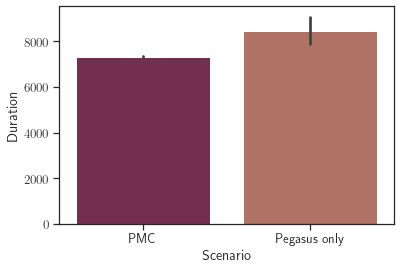

In [8]:
sns.barplot(x='Scenario', y='Duration', data=debug_df)

In [9]:
from datetime import datetime
datetime.strptime('2021-10-02T17:54:33','%Y-%m-%dT%H:%M:%S')
# date_time_obj = datetime.strptime(date_time_str, '%y-%m-%yT%H:%M:%S-07:00')
# data_time_obj
debug_df['Start Time'] = pd.to_datetime(debug_df['Start'], format='%Y-%m-%dT%H:%M:%S')
debug_df

,Scenario,Start,Duration,Start Time
0,PMC,2021-10-13T12:48:58,7196.181,2021-10-13 12:48:58
1,PMC,2021-10-13T12:48:58,7298.147,2021-10-13 12:48:58
2,PMC,2021-10-13T12:48:58,7284.725,2021-10-13 12:48:58
3,PMC,2021-10-13T12:48:58,7321.033,2021-10-13 12:48:58
4,PMC,2021-10-13T12:48:58,7266.703,2021-10-13 12:48:58
5,PMC,2021-10-13T12:48:58,7303.926,2021-10-13 12:48:58
6,PMC,2021-10-13T12:48:58,7335.711,2021-10-13 12:48:58
7,PMC,2021-10-13T12:48:58,7361.326,2021-10-13 12:48:58
8,PMC,2021-10-13T12:48:58,7370.093,2021-10-13 12:48:58
9,PMC,2021-10-13T12:48:58,7304.217,2021-10-13 12:48:58


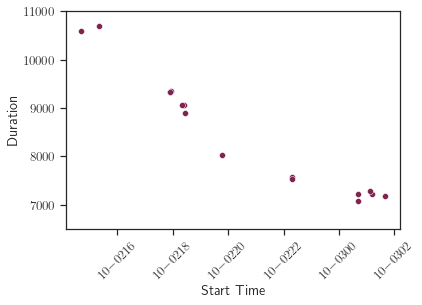

In [17]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")
sns.set_palette("twilight_shifted_r")
sub_df = debug_df[debug_df['Scenario'] == "Pegasus only"]
ax = sns.scatterplot(x='Start Time',y='Duration',data=sub_df)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylim([6500, 11000])
plt.savefig('pmc_individuals.png', bbox_inches='tight')

(6500.0, 11000.0)

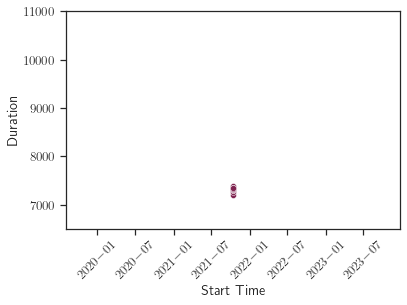

In [11]:
sub_df = debug_df[debug_df['Scenario'] == "PMC"]
ax = sns.scatterplot(x='Start Time',y='Duration',data=sub_df)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylim([6500, 11000])

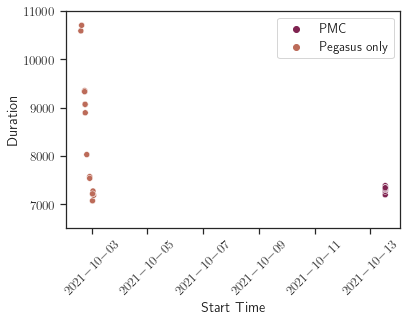

In [18]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")
sns.set_palette("twilight_shifted_r")
ax = sns.scatterplot(x='Start Time',y='Duration',data=debug_df, hue='Scenario')
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylim([6500, 11000])
ax.legend_.set_title("")
plt.savefig('details.png', bbox_inches='tight')

Todo: Normalize to pegasus